In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [3]:
# Load the dataset from the specified file path
file_path = r'E:\ML\global youtube statistics.csv'  # Define the path to the CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1') 

In [4]:
# 1. Initial Inspection
print("Dataset Overview:")
# Display the first 5 rows of the dataset to get a quick look at the data
print(df.head(), "\n")

print("Dataset Info:")
# Provide detailed information about the dataset including the number of entries, columns, data types, and non-null counts
print(df.info(), "\n")

print("Data Types:")
# Show the data types of each column to identify if any columns need type conversion
print(df.dtypes, "\n")

Dataset Overview:
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  Validity  
0           IN          Music         1  
1           US          Games         1  
2       

In [5]:
# 2. Missing Values and Duplicates
print("Missing Values:")
# Display the count of missing (null) values for each column in the dataset
print(df.isnull().sum(), "\n")

print(f"Number of duplicate rows: {df.duplicated().sum()}\n")
# Display the number of duplicate rows in the dataset


Missing Values:
rank             0
Youtuber         0
subscribers      0
video views      0
category        23
Title            0
uploads          0
Country         74
Abbreviation    74
channel_type    17
Validity         0
dtype: int64 

Number of duplicate rows: 0



In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
         df[col].fillna(df[col].mean(),inplace=True)

# Check for any remaining null values
print(df.isnull().sum())


rank            0
Youtuber        0
subscribers     0
video views     0
category        0
Title           0
uploads         0
Country         0
Abbreviation    0
channel_type    0
Validity        0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_17056\2059137705.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17056\2059137705.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [7]:
# 3. Descriptive Statistics
print("Descriptive Statistics:")
# Get numeric columns only (int64 and float64 types)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Generate descriptive statistics summary for numeric columns
stats_summary = df.describe().T

# Calculate the range for each column (max - min)
stats_summary['range'] = stats_summary['max'] - stats_summary['min']

# Calculate the median for each numeric column
stats_summary['median'] = df[num_cols].median()

# Calculate the mode for each numeric column (the most frequent value)
stats_summary['mode'] = df[num_cols].mode().iloc[0]

# Print the summary statistics
print(stats_summary, "\n")


Descriptive Statistics:
             count          mean           std         min           25%  \
rank         500.0  2.505000e+02  1.444818e+02         1.0  1.257500e+02   
subscribers  500.0  3.132500e+07  2.166815e+07  17700000.0  2.047500e+07   
video views  500.0  1.577333e+10  1.830877e+10         0.0  6.602313e+09   
uploads      500.0  8.596802e+03  3.167721e+04         0.0  1.682500e+02   
Validity     500.0  4.000000e-01  4.903886e-01         0.0  0.000000e+00   

                      50%           75%           max         range  \
rank         2.505000e+02  3.752500e+02  5.000000e+02  4.990000e+02   
subscribers  2.455000e+07  3.350000e+07  2.450000e+08  2.273000e+08   
video views  1.147505e+10  1.943593e+10  2.280000e+11  2.280000e+11   
uploads      7.260000e+02  3.031000e+03  3.013080e+05  3.013080e+05   
Validity     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                   median        mode  
rank         2.505000e+02         1.0  
subscribers 

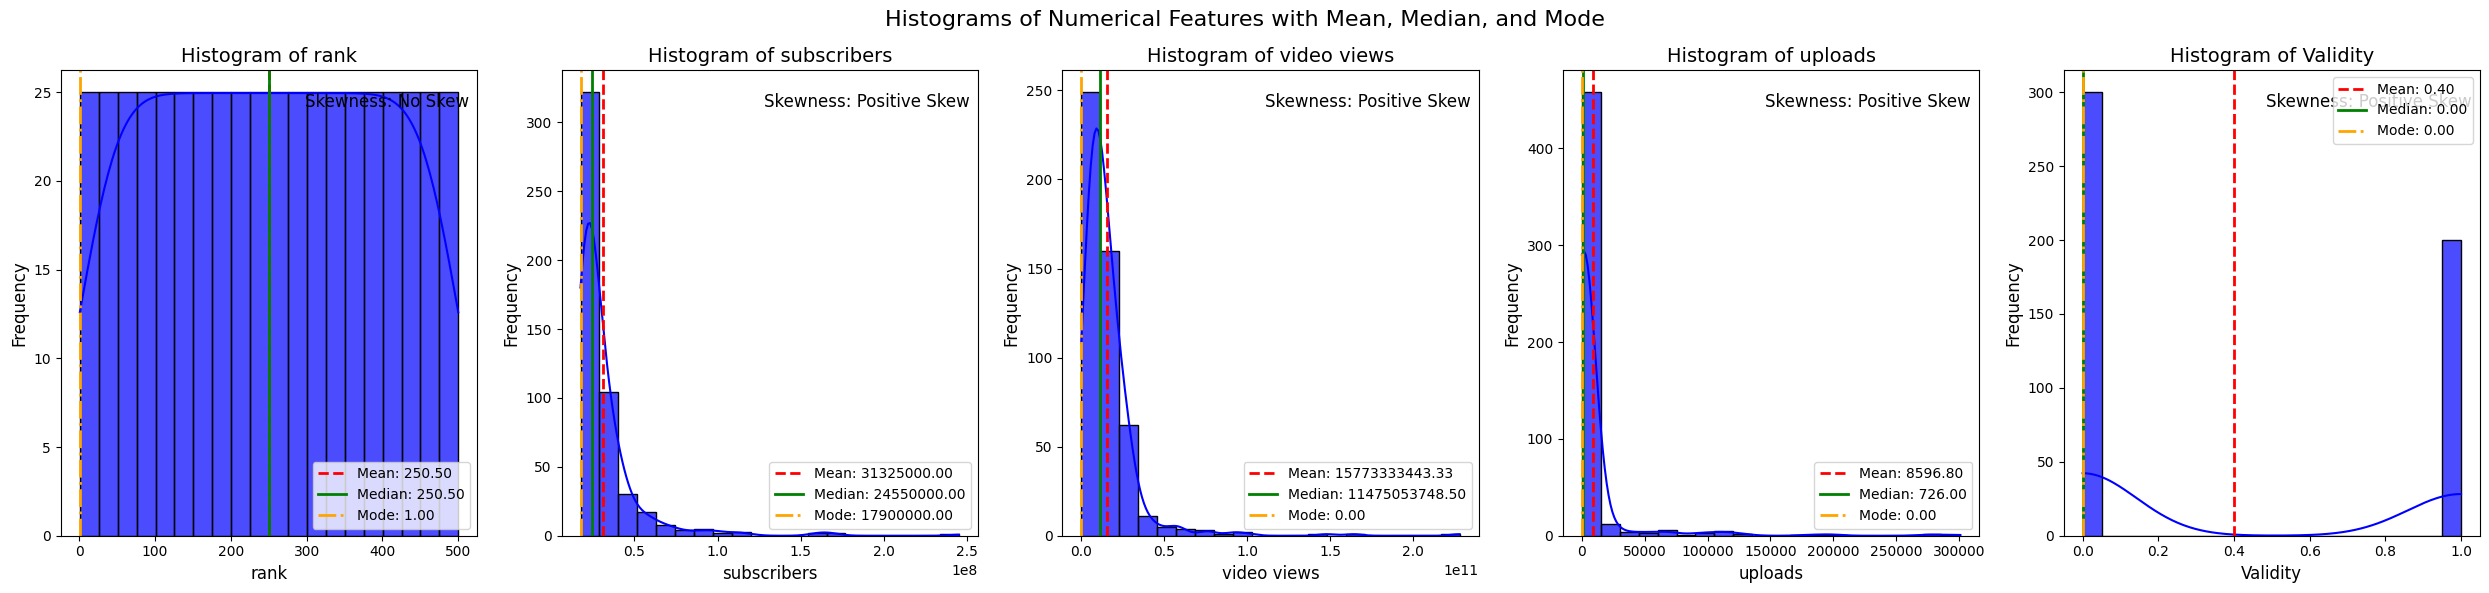

In [8]:
# Assuming df is your DataFrame
# Automatically detect numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Create the list of columns to plot
columns_to_plot = list(num_cols)

# Check if 'Negative_Skew_Example' exists and add it only if not already present
if 'Negative_Skew_Example' not in df.columns and len(num_cols) > 0:
    df['Negative_Skew_Example'] = np.log1p(df[num_cols[0]])

# Create subplots for all numeric features in a horizontal layout
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(5 * len(columns_to_plot), 6))
fig.suptitle("Histograms of Numerical Features with Mean, Median, and Mode", fontsize=16, y=0.98)

# Loop through each numeric column to plot
for i, col in enumerate(columns_to_plot):
    ax = axes[i] if len(columns_to_plot) > 1 else axes
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, bins=20, color="blue", edgecolor="black", alpha=0.7, ax=ax)
    
    # Calculate mean, median, and mode
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    
    # Add vertical lines for mean, median, and mode
    ax.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f}")
    ax.axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median: {median:.2f}")
    ax.axvline(mode, color='orange', linestyle='-.', linewidth=2, label=f"Mode: {mode:.2f}")
    
    # Add title and legend
    ax.set_title(f"Histogram of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.legend(fontsize=10)
    
    # Determine skewness type
    if mean > median:
        skewness_type = "Positive Skew"
    elif mean < median:
        skewness_type = "Negative Skew"
    else:
        skewness_type = "No Skew"
    
    # Annotate skewness type on the plot
    ax.text(0.98, 0.95, f"Skewness: {skewness_type}",
            transform=ax.transAxes, fontsize=12, color='black', ha='right', va='top')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17056\110093982.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


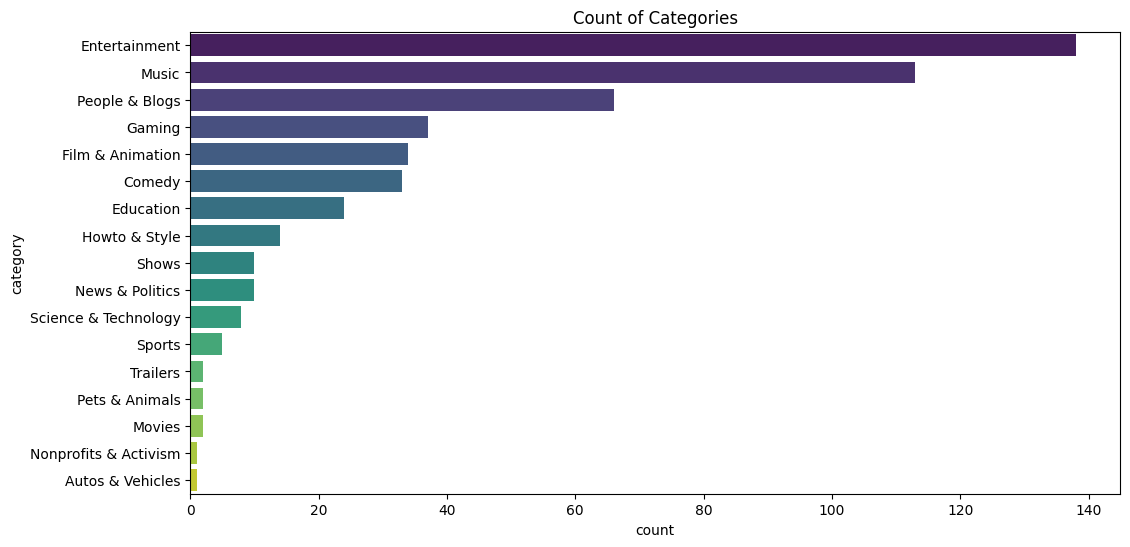

In [9]:
# Distribution of nominal variables using count plot
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    # Plot a count plot for the 'category' column, ordered by the frequency of each category
    sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
    plt.title("Count of Categories")
    plt.show()



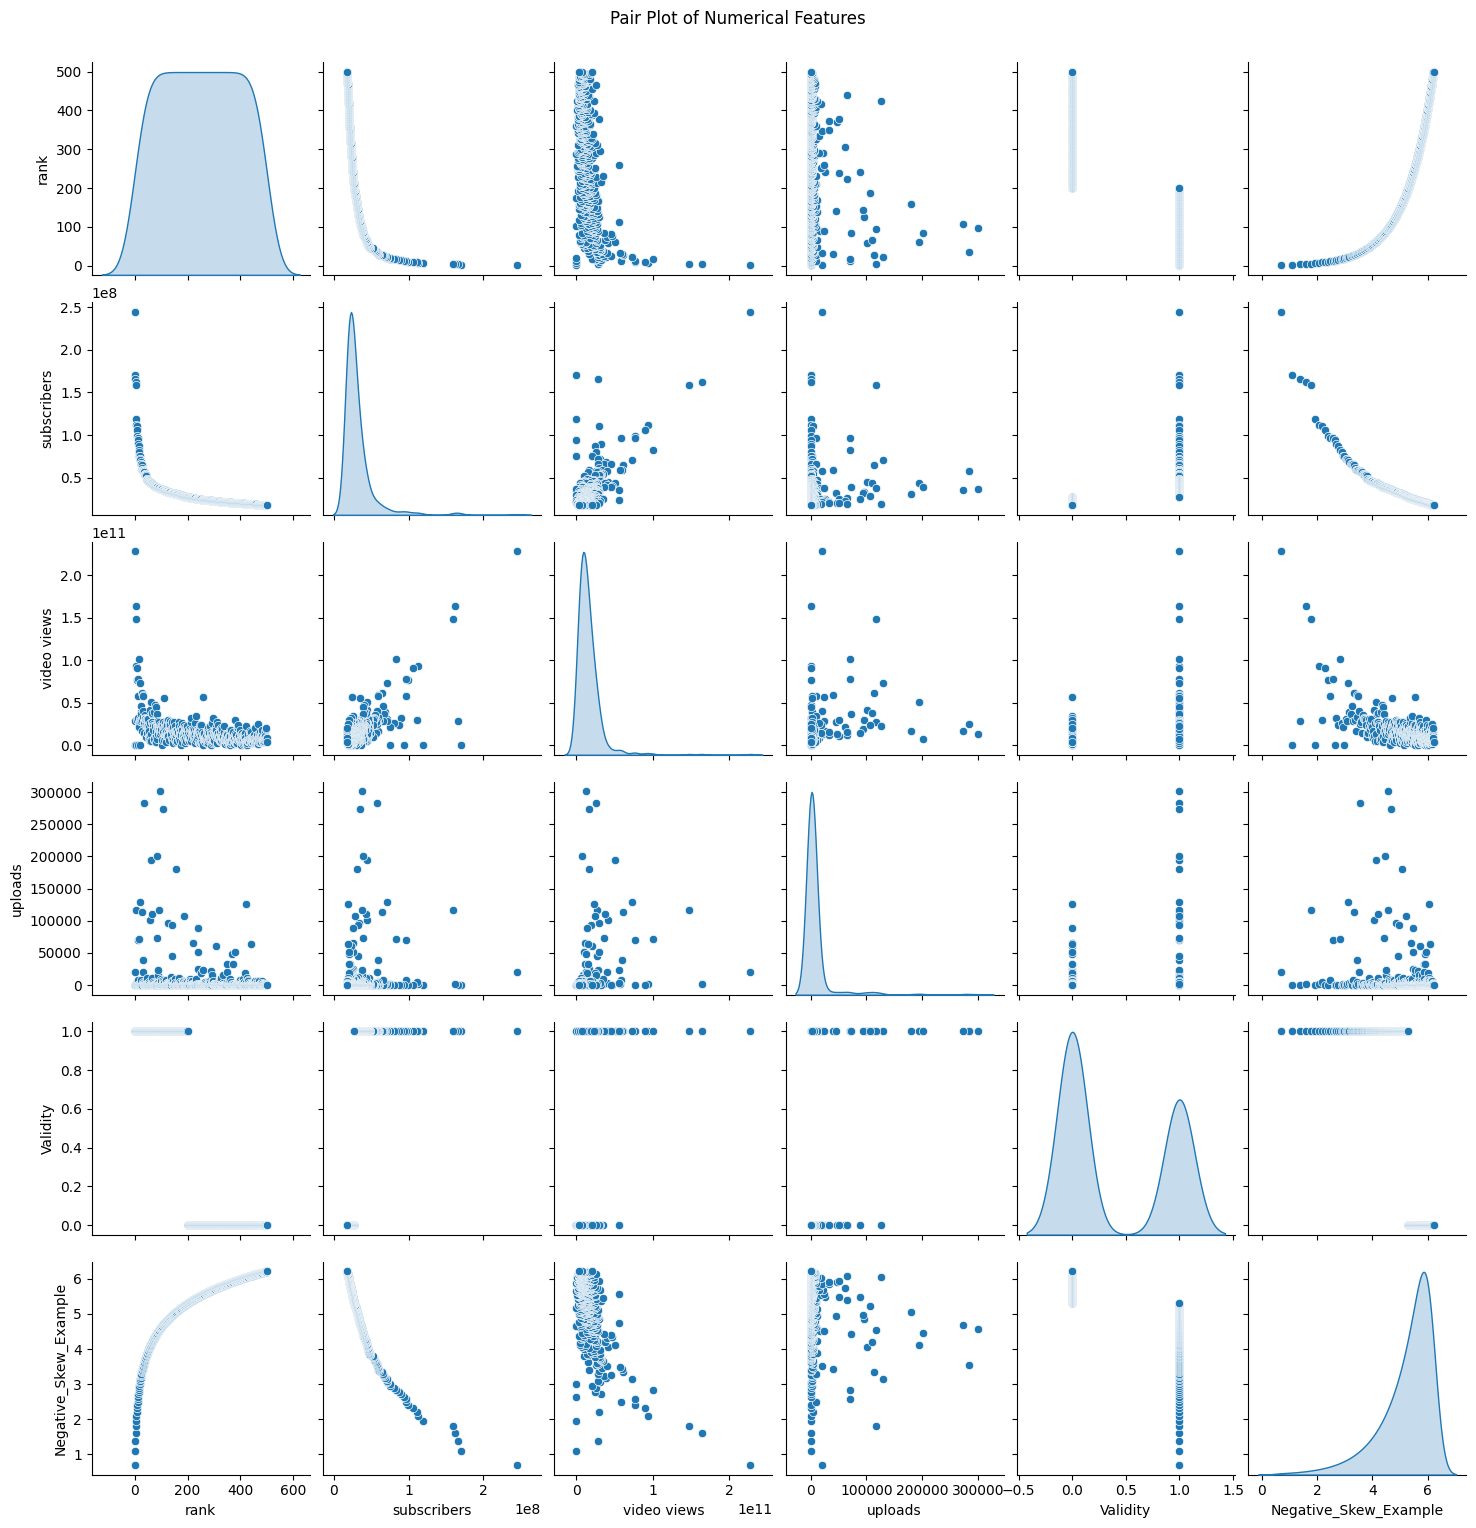

In [11]:
    sns.pairplot(df[num_cols], diag_kind="kde",)
    plt.suptitle("Pair Plot of Numerical Features", y=1.02)
    plt.show()

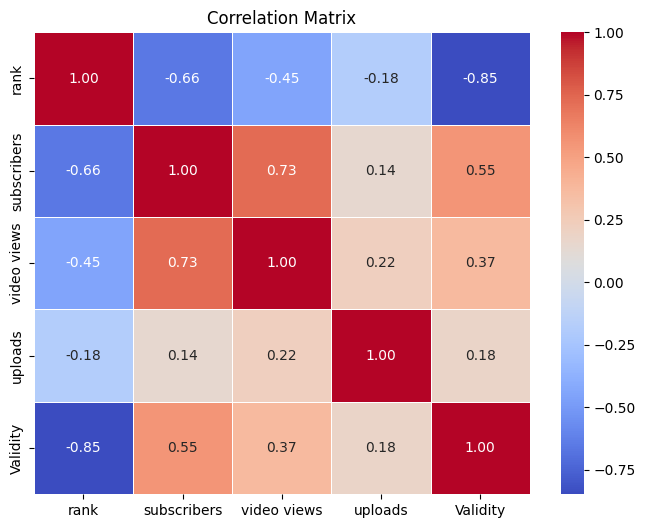

In [10]:
# Heat map for Correlation
plt.figure(figsize=(8, 6))  # Create a figure with a size of 8x6 inches to ensure readability of the heatmap

# Generate the heatmap:
# df[num_cols].corr() calculates the correlation matrix for the numerical columns in the dataset
# annot=True annotates the heatmap cells with the correlation coefficient values
# cmap='coolwarm' uses a color palette from blue (negative) to red (positive) to represent the correlation strength
# fmt='.2f' formats the correlation values to two decimal places for clarity
# linewidths=0.5 adjusts the width of the lines separating cells in the heatmap, making them subtle
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  

plt.title("Correlation Matrix")  # Adds a title "Correlation Matrix" to the heatmap

plt.show()  # Display the heatmap to the screen


In [13]:
import category_encoders as ce

# Sample data
data = {
    'Country': ['India', 'United States', 'United States', 'United States', 'India']
}

df = pd.DataFrame(data)

# Convert the 'Country' column to categorical dtype
df['Country'] = df['Country'].astype('category')

# One-Hot Encoding for the 'Country' column using category_encoders
encoder = ce.OneHotEncoder(cols=['Country'], use_cat_names=True)
df_encoded = encoder.fit_transform(df)

# Display the result
print("One-Hot Encoded Data using category_encoders:")
print(df_encoded.head())






One-Hot Encoded Data using category_encoders:
   Country_India  Country_United States
0              1                      0
1              0                      1
2              0                      1
3              0                      1
4              1                      0


In [14]:


# Sample data
data = {
    'Country': ['India', 'United States', 'United States', 'United States', 'India']
}

df = pd.DataFrame(data)

# Convert the 'Country' column to categorical dtype
df['Country'] = df['Country'].astype('category')

# Dummy Encoding for the 'Country' column using category_encoders
encoder = ce.OneHotEncoder(cols=['Country'], use_cat_names=True, drop_invariant=True)
df_encoded = encoder.fit_transform(df).iloc[:, 1:]  # Drop the first column explicitly

# Display the result
print("Dummy Encoded Data using category_encoders:")
print(df_encoded.head())



Dummy Encoded Data using category_encoders:
   Country_United States
0                      0
1                      1
2                      1
3                      1
4                      0


In [15]:
import pandas as pd
import category_encoders as ce

# Sample data
data = {
    'Channel_Type': [
        'Music', 'Games', 'Entertainment', 'Education', 'Entertainment',
        'Music', 'Entertainment', 'Entertainment', 'People', 'Entertainment',
        'Music', 'Sports', 'Games', 'Music', 'Music', 'Entertainment',
        'Entertainment', 'Music', 'Entertainment', 'Music', 'Music',
        'Entertainment', 'Education', 'Music', 'Education', 'Music',
        'Entertainment', 'Music', 'Sports', 'Film', 'Music', 'Music',
        'Music', 'News'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Ordinal Encoding for the 'Channel_Type' column using category_encoders
encoder = ce.OrdinalEncoder(cols=['Channel_Type'])
df_encoded = encoder.fit_transform(df)

# Combine original and encoded data
df_combined = pd.concat([df, df_encoded], axis=1)
df_combined.columns = ['Channel_Type (Original)', 'Channel_Type (Encoded)']

# Display the result
print("Original Data with Ordinal Encoding:")
print(df_combined)


Original Data with Ordinal Encoding:
   Channel_Type (Original)  Channel_Type (Encoded)
0                    Music                       1
1                    Games                       2
2            Entertainment                       3
3                Education                       4
4            Entertainment                       3
5                    Music                       1
6            Entertainment                       3
7            Entertainment                       3
8                   People                       5
9            Entertainment                       3
10                   Music                       1
11                  Sports                       6
12                   Games                       2
13                   Music                       1
14                   Music                       1
15           Entertainment                       3
16           Entertainment                       3
17                   Music                   

In [16]:
import pandas as pd

# Sample data
data = {
    'Channel_Type': [
        'Music', 'Games', 'Entertainment', 'Education', 'Entertainment',
        'Music', 'Entertainment', 'Entertainment', 'People', 'Entertainment',
        'Music', 'Sports', 'Games', 'Music', 'Music', 'Entertainment',
        'Entertainment', 'Music', 'Entertainment', 'Music', 'Music',
        'Entertainment', 'Education', 'Music', 'Education', 'Music',
        'Entertainment', 'Music', 'Sports', 'Film', 'Music', 'Music',
        'Music', 'News'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Count the occurrences of each category
count_encoding = df['Channel_Type'].value_counts().to_dict()

# Map each category to its count value
df['Channel_Type_Count'] = df['Channel_Type'].map(count_encoding)

# Display the result without the 8421 binary encoding
print("Data with Count Encoding:")
print(df[['Channel_Type', 'Channel_Type_Count']])


Data with Count Encoding:
     Channel_Type  Channel_Type_Count
0           Music                  14
1           Games                   2
2   Entertainment                  10
3       Education                   3
4   Entertainment                  10
5           Music                  14
6   Entertainment                  10
7   Entertainment                  10
8          People                   1
9   Entertainment                  10
10          Music                  14
11         Sports                   2
12          Games                   2
13          Music                  14
14          Music                  14
15  Entertainment                  10
16  Entertainment                  10
17          Music                  14
18  Entertainment                  10
19          Music                  14
20          Music                  14
21  Entertainment                  10
22      Education                   3
23          Music                  14
24      Education       

In [17]:
import pandas as pd
import category_encoders as ce

# Sample data
data = {
    'Channel_Type': [
        'Music', 'Games', 'Entertainment', 'Education', 'Entertainment',
        'Music', 'Entertainment', 'Entertainment', 'People', 'Entertainment',
        'Music', 'Sports', 'Games', 'Music', 'Music', 'Entertainment',
        'Entertainment', 'Music', 'Entertainment', 'Music', 'Music',
        'Entertainment', 'Education', 'Music', 'Education', 'Music',
        'Entertainment', 'Music', 'Sports', 'Film', 'Music', 'Music',
        'Music', 'News'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Binary Encoding for the 'Channel_Type' column
encoder = ce.BinaryEncoder(cols=['Channel_Type'])
df_encoded = encoder.fit_transform(df)

# Combine original and encoded data
df_combined = pd.concat([df, df_encoded], axis=1)

# Display the result
print("Original Data with Binary Encoding:")
print(df_combined.head())


Original Data with Binary Encoding:
    Channel_Type  Channel_Type_0  Channel_Type_1  Channel_Type_2  \
0          Music               0               0               0   
1          Games               0               0               1   
2  Entertainment               0               0               1   
3      Education               0               1               0   
4  Entertainment               0               0               1   

   Channel_Type_3  
0               1  
1               0  
2               1  
3               0  
4               1  


In [18]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Load the dataset from the specified file path
file_path = r'E:\ML\global youtube statistics.csv'  # Define the path to the CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1') 

label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [16]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Define features (X) and target (y)
X = df.drop(columns=['Validity'])
Y = df['Validity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
# Scale numerical data for GaussianNB
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

In [22]:
# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [23]:
# Evaluate Accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb}")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")

Gaussian Naive Bayes Accuracy: 0.96
Multinomial Naive Bayes Accuracy: 0.56


In [24]:
# Confusion Matrix with Cross-Validation
y_pred_cv_gnb = cross_val_predict(gnb, scaler.transform(X), Y, cv=5)
y_pred_cv_mnb = cross_val_predict(mnb, X, Y, cv=5)

Confusion Matrix for GaussianNB:
[[269  31]
 [ 25 175]]
Confusion Matrix for MultinomialNB:
[[180 120]
 [ 96 104]]


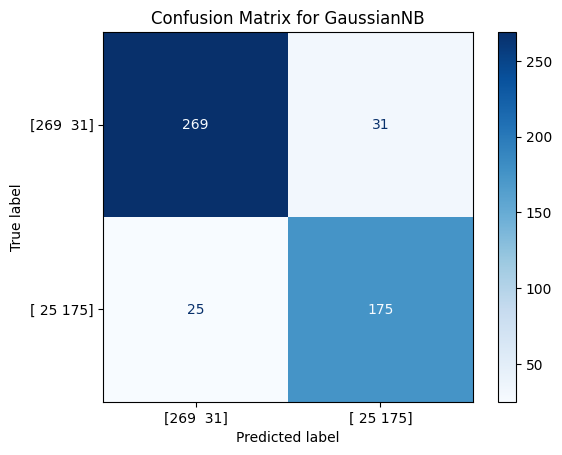

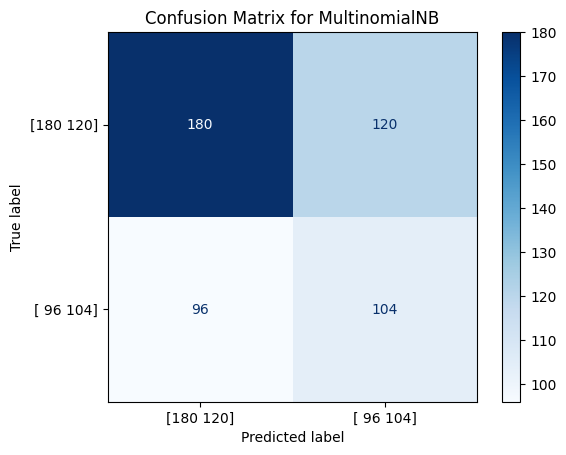

In [25]:
cm_gnb = confusion_matrix(Y, y_pred_cv_gnb)
cm_mnb = confusion_matrix(Y, y_pred_cv_mnb)
print("Confusion Matrix for GaussianNB:")
print(cm_gnb)
print("Confusion Matrix for MultinomialNB:")
print(cm_mnb)

# Plot confusion matrix for GaussianNB
cm_gnb_disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=cm_gnb)
cm_gnb_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for GaussianNB')
plt.show()

cm_mnb_disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=cm_mnb)
cm_mnb_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for MultinomialNB')
plt.show()

In [26]:
# ROC Curve
fpr_gnb, tpr_gnb, _ = roc_curve(Y, y_pred_cv_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_mnb, tpr_mnb, _ = roc_curve(Y, y_pred_cv_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

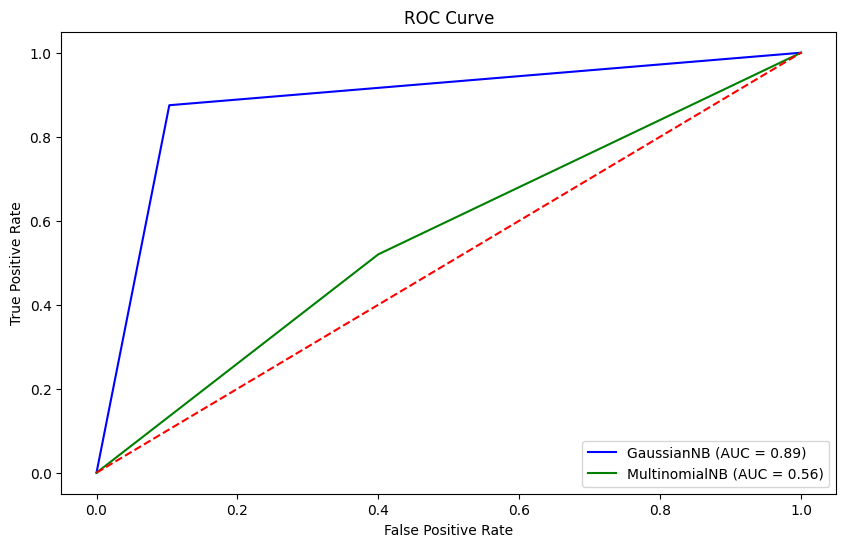

In [58]:

plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, color='green', label=f'MultinomialNB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
